In [9]:
import pandas as pd, numpy as np, os, seaborn as sns, librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/toronto-emotional-speech-set-tess


In [3]:
import torchaudio
import torch


### Dataset-> Toronto Emotional Speech dataset

In [14]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
    if len(paths)==2800:
        break
print('Dataset loaded')


Dataset loaded


In [15]:
len(paths)

2800

In [16]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [19]:
df=pd.DataFrame()
df['audio_paths']=paths
df['labels']=labels
df.head()

,audio_paths,labels
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [20]:
df['labels'].value_counts()

,count
labels,
fear,400
angry,400
disgust,400
neutral,400
sad,400
ps,400
happy,400


## Exploratory Data Analysis

<Axes: xlabel='labels', ylabel='count'>

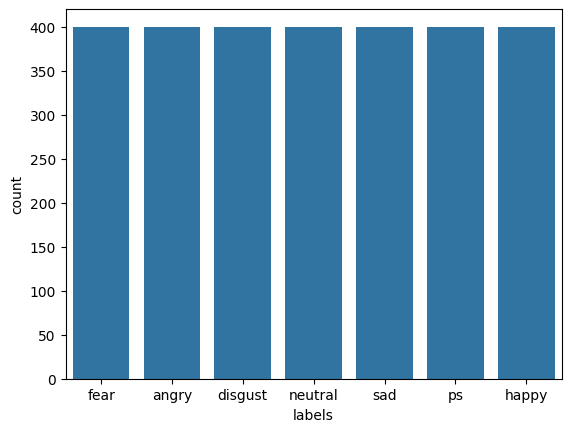

In [21]:
sns.countplot(data=df,x='labels')

In [22]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectrogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis="time",y_axis="hz")
    plt.colorbar()

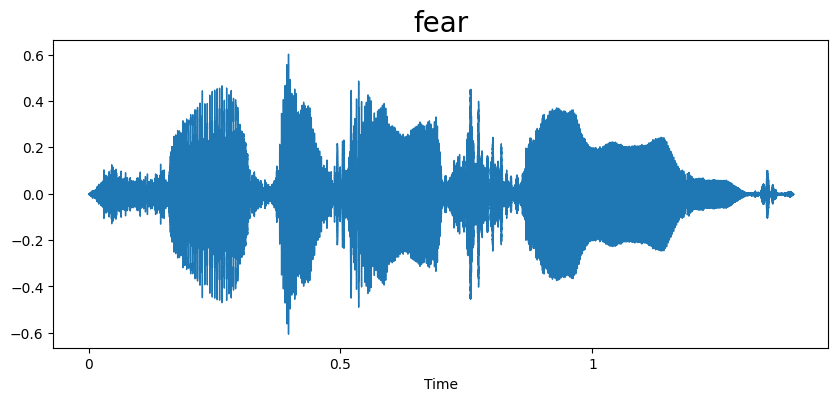

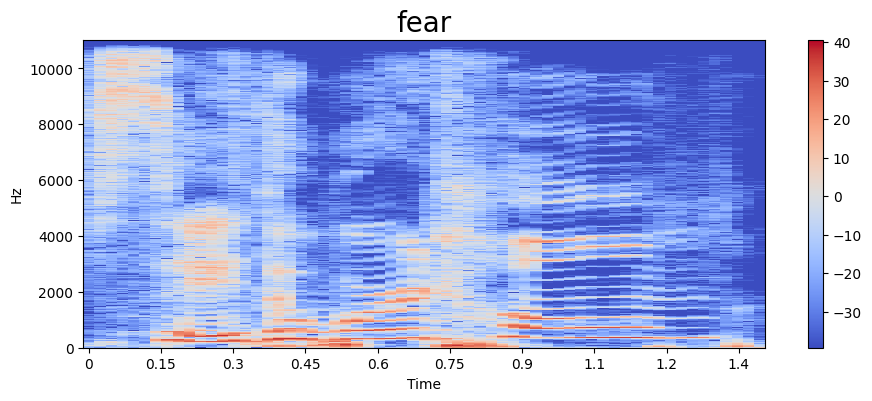

In [23]:
emotion="fear"
path=np.array(df['audio_paths'][df['labels']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion=emotion)
spectrogram(data=data,sr=sampling_rate,emotion=emotion)
Audio(path)


Create a custom dataset class

In [24]:
# convert labels to integers
label_map={label:idx for idx, label in enumerate(df['labels'].unique())}

In [25]:
inverse_label_map={idx:label for idx, label in label_map.items()}
df['labels']

,labels
0,fear
1,fear
2,fear
3,fear
4,fear
...,...
2795,ps
2796,ps
2797,ps
2798,ps
